<a href="https://colab.research.google.com/github/Henil21/Intro_to_computer_vision_and_CNN/blob/main/Computer_vision_CNN_in_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Architecture of CNN
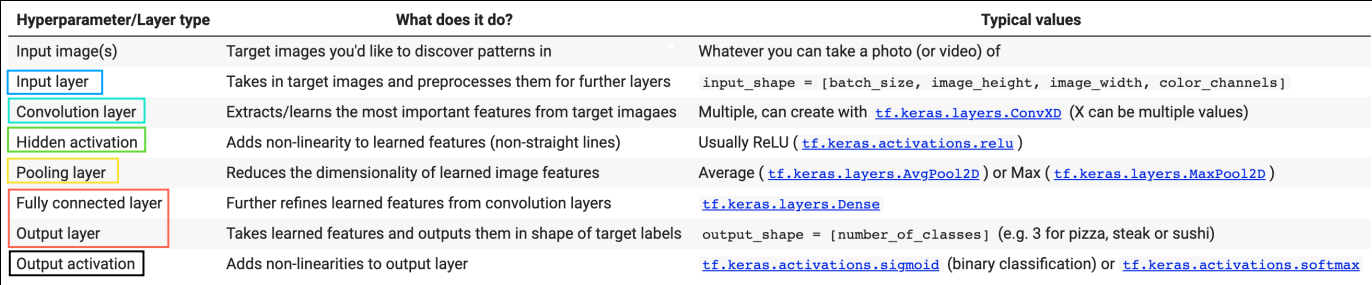

# Introduction to Convolutional Neural Networks and Computer Vision with Tensorflow

computer vision is the practice of writing algorithms which can discover pattern in visual data.

# Get The data


In [17]:
import zipfile
# Download zip file of pizza_steak images
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# Unzipping
zip_ref=zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2022-10-18 11:36:24--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.70.128, 74.125.132.128, 74.125.201.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.70.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip.1’

pizza_steak.zip.1   100%[===================>] 104.47M   237MB/s    in 0.4s    

2022-10-18 11:36:25 (237 MB/s) - ‘pizza_steak.zip.1’ saved [109540975/109540975]



## Inspect data (become one with data)

* A very crucial step at the beginning of any machine learning project is becoming one with the data. This usually means plenty of visualizing and folder scanning to understand the data you're working with.


* Wtih this being said, let's inspect the data we just downloaded.

* The file structure has been formatted to be in a typical format you might use for working with images.


In [18]:
!ls pizza_steak

test  train


In [19]:
# !ls pizza_steak/train/pizzas
import os
# walk thorugh pizza_steak directory and list number of files
for dirpath , dirname, filenames in os.walk("pizza_steak"):
  print(f"there are {len(dirname)} directories and {len(filenames)} images is '{dirpath}'")

there are 2 directories and 0 images is 'pizza_steak'
there are 2 directories and 0 images is 'pizza_steak/test'
there are 0 directories and 250 images is 'pizza_steak/test/pizza'
there are 0 directories and 250 images is 'pizza_steak/test/steak'
there are 2 directories and 0 images is 'pizza_steak/train'
there are 0 directories and 750 images is 'pizza_steak/train/pizza'
there are 0 directories and 750 images is 'pizza_steak/train/steak'


In [20]:
# another way to find number of image in file
num_steak_img_train=len(os.listdir("pizza_steak/train/steak"))
num_steak_img_train

750

**To Visualize our images lets get clas name programmatically**

In [21]:
# get the class name programmatically
import pathlib
import numpy as np
data_dir=pathlib.Path("pizza_steak/train")
class_name=np.array(sorted([item.name for item in data_dir.glob("*")])) # created a list of class_name from the subdirectories
print(class_name)

['pizza' 'steak']


In [22]:
# lets visualize our images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
def view_random_image(target_dir,target_class):
  # setup the target directory (we will view images from here)
  target_folder=target_dir+target_class

  # get a random image path
  random_image=random.sample(os.listdir(target_folder),1)
  print(random_image)
  # Read in the image and plot it using matplotlib
  img=mpimg.imread(target_folder+"/"+random_image[0])
  plt.imshow(img)
  plt.axis("off");
  print(f"img shape:{img.shape}")
  
  return img


['598381.jpg']
img shape:(306, 512, 3)


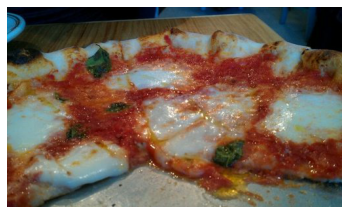

In [23]:
# View random image
img=view_random_image(target_dir="pizza_steak/train/",
                      target_class="pizza")

In [24]:
# converting array into tensor
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(306, 512, 3), dtype=uint8, numpy=
array([[[  5,   7,  28],
        [  6,   8,  29],
        [  8,  10,  33],
        ...,
        [  1,   3,   2],
        [  0,   2,   1],
        [  0,   2,   1]],

       [[  0,   7,  22],
        [  0,   8,  25],
        [  0,   9,  26],
        ...,
        [  1,   2,   4],
        [  1,   2,   4],
        [  2,   3,   5]],

       [[  0,   8,  19],
        [  0,   8,  19],
        [  0,   9,  21],
        ...,
        [  1,   2,   4],
        [  3,   4,   6],
        [  4,   5,   9]],

       ...,

       [[ 61,   8,  16],
        [ 64,  11,  19],
        [ 63,  10,  18],
        ...,
        [ 61, 100, 107],
        [ 61,  98, 106],
        [ 57,  94, 102]],

       [[ 57,   8,  14],
        [ 63,  14,  20],
        [ 70,  21,  27],
        ...,
        [ 56,  99, 105],
        [ 56, 101, 104],
        [ 56, 101, 104]],

       [[ 58,   9,  15],
        [ 65,  16,  22],
        [ 71,  22,  28],
        ...,
        [ 56,  99, 10

In [25]:
# view thr img shape
img.shape
# return (width,height,colour channel)

(306, 512, 3)

**🔑Note**: As we've discussed before, many machine learning models, including neural networks prefer the values they work with to be between 0 and 1. Knowing this, one of the most common preprocessing steps for working with images is to scale (also referred to as normalize) their pixel values by dividing the image arrays by 255.

In [26]:
# Get all the pixel value between 0 and 1
img/225

array([[[0.02222222, 0.03111111, 0.12444444],
        [0.02666667, 0.03555556, 0.12888889],
        [0.03555556, 0.04444444, 0.14666667],
        ...,
        [0.00444444, 0.01333333, 0.00888889],
        [0.        , 0.00888889, 0.00444444],
        [0.        , 0.00888889, 0.00444444]],

       [[0.        , 0.03111111, 0.09777778],
        [0.        , 0.03555556, 0.11111111],
        [0.        , 0.04      , 0.11555556],
        ...,
        [0.00444444, 0.00888889, 0.01777778],
        [0.00444444, 0.00888889, 0.01777778],
        [0.00888889, 0.01333333, 0.02222222]],

       [[0.        , 0.03555556, 0.08444444],
        [0.        , 0.03555556, 0.08444444],
        [0.        , 0.04      , 0.09333333],
        ...,
        [0.00444444, 0.00888889, 0.01777778],
        [0.01333333, 0.01777778, 0.02666667],
        [0.01777778, 0.02222222, 0.04      ]],

       ...,

       [[0.27111111, 0.03555556, 0.07111111],
        [0.28444444, 0.04888889, 0.08444444],
        [0.28      , 0

## An end-to-end examplel
let's build a CNN to find the patterns in our images 


* Load our images
* Preprocess our images
* Build a CNN to find patterm in our images
* Compile our CNN
* Fit the CNN to our training data

In [11]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(42)


# preprocess data get pixel value between 0 and 1 its also called scaling/normalization
train_datagen=ImageDataGenerator(rescale=1./255)
valid_datagen=ImageDataGenerator(rescale=1./255)


# setup path for data dir
train_dir="/content/pizza_steak/train"
test_dir="/content/pizza_steak/test"


# import data from directories and turn it into batches
train_data=train_datagen.flow_from_directory(train_dir,
                                             batch_size=32,
                                             target_size=(224,224),
                                             class_mode="binary",
                                             seed=42)

valid_data=valid_datagen.flow_from_directory(test_dir,
                                             batch_size=32,
                                             target_size=(224,224),
                                             class_mode="binary",
                                             seed=42)

# Build CNN model (same as Tiny VGG on the CNN explainer website)
model_1=tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation='relu',
                           input_shape=(224,224,3)),

     tf.keras.layers.Conv2D(10,3,activation='relu'),

     tf.keras.layers.MaxPool2D(pool_size=2,
                              padding="valid",
                              ),

     tf.keras.layers.Conv2D(10,3,activation='relu'),
     tf.keras.layers.Conv2D(10,3,activation='relu'),

     tf.keras.layers.MaxPool2D(2),
     tf.keras.layers.Flatten(),
     tf.keras.layers.Dense(1,activation="sigmoid")
])

# compile our CNN
model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

history=model_1.fit(train_data,
                    epochs=5,
                    validation_data=valid_data,
                    steps_per_epoch=len(train_data),
                    validation_steps=len(valid_data))


Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 26s 342ms/step - loss: 0.5580 - accuracy: 0.7147 - val_loss: 0.3895 - val_accuracy: 0.8280
Epoch 2/5
47/47 [==============================] - 10s 207ms/step - loss: 0.4062 - accuracy: 0.8187 - val_loss: 0.3217 - val_accuracy: 0.8780
Epoch 3/5
47/47 [==============================] - 10s 210ms/step - loss: 0.4063 - accuracy: 0.8233 - val_loss: 0.3162 - val_accuracy: 0.8640
Epoch 4/5
47/47 [==============================] - 10s 210ms/step - loss: 0.3743 - accuracy: 0.8300 - val_loss: 0.3015 - val_accuracy: 0.8760
Epoch 5/5
47/47 [==============================] - 10s 208ms/step - loss: 0.3364 - accuracy: 0.8607 - val_loss: 0.2951 - val_accuracy: 0.8880


In [12]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

# using same model as before


In [13]:
import tensorflow as tf
tf.random.set_seed(42)

model_2=tf.keras.Sequential([
    
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid'),
                           
])

model_2.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

history_2=model_2.fit(train_data,
                      epochs=5,
                      steps_per_epoch=len(train_data),
                      validation_data=valid_data,
                      validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 10s 197ms/step - loss: 0.9043 - accuracy: 0.5047 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 9s 191ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 9s 191ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 10s 213ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 9s 194ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000


In [14]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 150528)            0         
                                                                 
 dense_1 (Dense)             (None, 4)                 602116    
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 602,141
Trainable params: 602,141
Non-trainable params: 0
_________________________________________________________________


Despite having 20x more parameters in model_2 CNN model_1 was better lets try to improve it.

In [15]:
import  tensorflow as tf
tf.random.set_seed(42)
model_3=tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid'),

])
model_3.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

history_3=model_3.fit(train_data,
                      epochs=5,
                      steps_per_epoch=len(train_data),
                      validation_data=valid_data,
                      validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 10s 203ms/step - loss: 2.1241 - accuracy: 0.6493 - val_loss: 0.5050 - val_accuracy: 0.7660
Epoch 2/5
47/47 [==============================] - 9s 194ms/step - loss: 1.0044 - accuracy: 0.6833 - val_loss: 0.7199 - val_accuracy: 0.7020
Epoch 3/5
47/47 [==============================] - 9s 191ms/step - loss: 0.7053 - accuracy: 0.7307 - val_loss: 1.0858 - val_accuracy: 0.5180
Epoch 4/5
47/47 [==============================] - 9s 194ms/step - loss: 0.6535 - accuracy: 0.7293 - val_loss: 0.4495 - val_accuracy: 0.7860
Epoch 5/5
47/47 [==============================] - 9s 194ms/step - loss: 0.5328 - accuracy: 0.7640 - val_loss: 0.4249 - val_accuracy: 0.8040


In [16]:
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 150528)            0         
                                                                 
 dense_4 (Dense)             (None, 100)               15052900  
                                                                 
 dense_5 (Dense)             (None, 100)               10100     
                                                                 
 dense_6 (Dense)             (None, 100)               10100     
                                                                 
 dense_7 (Dense)             (None, 1)                 101       
                                                                 
Total params: 15,073,201
Trainable params: 15,073,201
Non-trainable params: 0
_________________________________________________________________


🔑**Note** a convolutional neural network seeks to sort out and learn the most important patterns in an image. So even though there are less learnable parameters in our convolutional neural network, these are often more helpful in decphering between different features in an image

## Binary classification: Let's break it down

We just went through a whirlwind of steps:

1. Become one with the data (visualize, visualize, visualize...)
2. Preprocess the data (prepare it for a model)
3. Create a model (start with a baseline)
4. Fit the model
5. Evaluate the model
6. Adjust different parameters and improve model (try to beat your baseline)
7. Repeat until satisfied
Let's step through each.

### 1. Become one with data

['1828969.jpg']
img shape:(512, 512, 3)
['1988629.jpg']
img shape:(512, 512, 3)


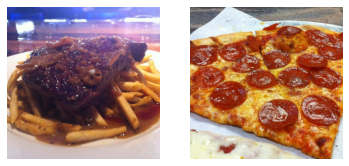

In [43]:
plt.figure()
plt.subplot(1,2,1)
steak_img=view_random_image("pizza_steak/train/","steak")
plt.subplot(1,2,2)
pizza_img=view_random_image("pizza_steak/train/","pizza")


### 2. Preprocess the data (prepare it for a model)

In [ ]:
train_dir="pizza_steak/train/"
test_dir="pizza_steak/test/"


our next step is to turn our data into **batches**

A batch is small subset of data. Rather than look at all ~100000(arbitrary number) images at one time , a model might only look at 32 at a time.

It does this for couple of reasons:
  
  1. 100000 images (or more)  might not fit into the memory of your processor(GPU) 